# Content
1. Import Libraries
2. Import Data
3. Vizualizations TASK 
    - bar
    - histogram
    - line
    - scatter

# Importing Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data 

In [2]:
path = r'C:\Users\tlayt\OneDrive\Documents\CF Data Analytics\Acheivement 4\Instacart Basket Analysis'

In [3]:
#import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'IC_merged_all.pkl'))


In [15]:
#importing customer data 
cust = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Customer_Clean.csv'), index_col = False)

# 4.9 Task Part 2

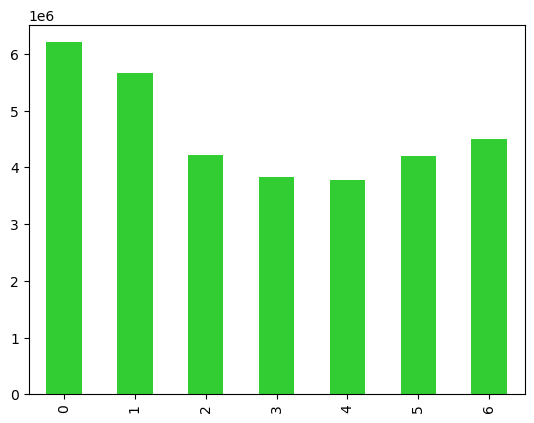

In [5]:
#creating bar chart 
bar_dow = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['limegreen'])

In [6]:
#exporting image
bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

Coping over what was compeleted in the lesson. I know there are outliers in the price category so I am changing those to NaN in the next few actions. 

In [7]:
# changing potential outliers to NaN
df.loc[df['prices'] >100, 'prices'] = np.nan

In [9]:
#checking 
df['prices'].max()

25.0

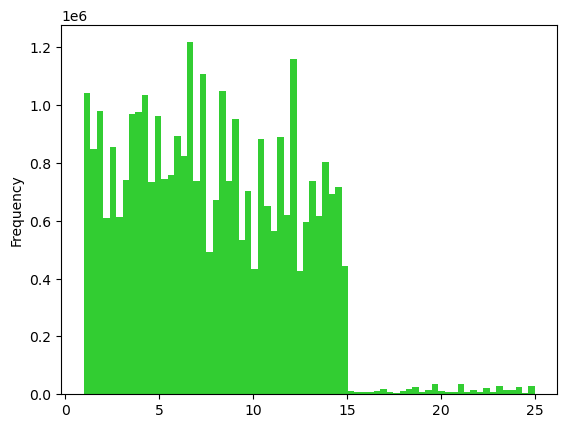

In [11]:
#creating histogram
hist_price = df['prices'].plot.hist(bins = 70, color = ['limegreen'])

In [12]:
#exporting image
hist_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_hist.png'))

In [17]:
#creating a random sample 
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [18]:
#checking
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
#splitting into two groups 
df_big = df[dev]
df_small = df[~dev]

In [20]:
#checking 
len(df)

32404859

In [21]:
len(df_small) + len(df_big)

32404859

In [22]:
#subset df to reduce to only desired columns to lessen run time 
df_2 = df_small[['orders_day_of_week','prices']]

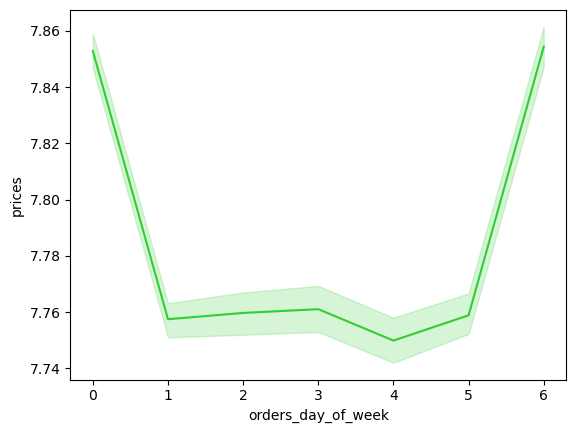

In [24]:
dow_price_line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices', color = 'limegreen')

In [25]:
#exporting image
dow_price_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_DOW_line.png'))

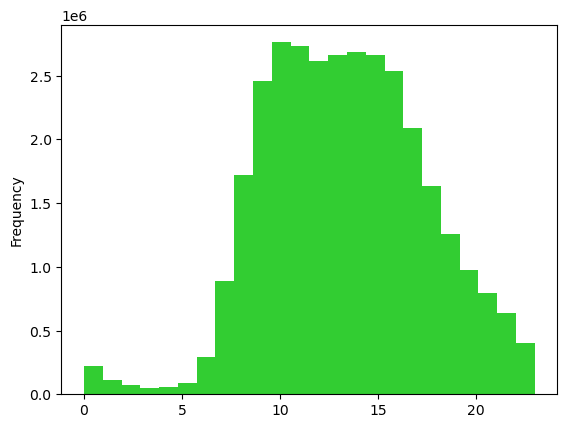

In [26]:
#creating histogram
hist_ords_hr = df['order_hour_of_day'].plot.hist(bins = 24, color = ['limegreen'])

The histogram above shows that the early hours of the the morning, so from midnight till about 6am, orders are very few. Then the most amount of orders happen from about 10am to about 3pm then start to steadily decrease in frequency till midnight and the cycle repeats. 

In [27]:
#exporting image
hist_ords_hr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ords_hr_of_day.png'))

In [29]:
#checking columns
df.columns

Index(['order_id', 'customer_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_labels', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spending', 'spending_flag', 'med_DSPO', 'frequency_flag',
       'First Name', 'Last Name', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

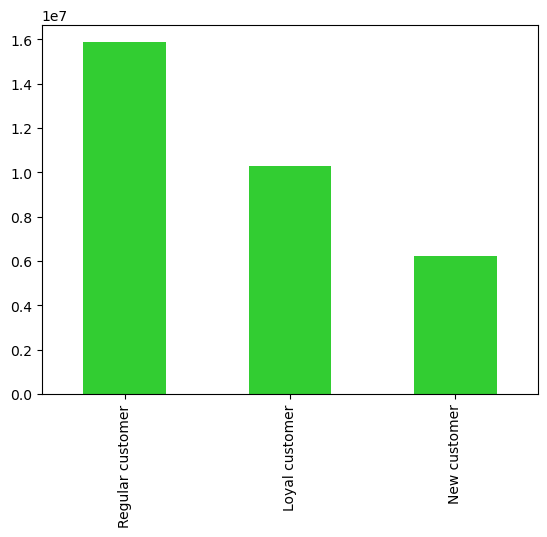

In [30]:
#creating bar chart for loyalty 
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar(color = ['limegreen'])

In [31]:
#exporting image
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty'))

In [33]:
#creating sub group for line chart 
df_3 = df_small[['prices', 'order_hour_of_day']]

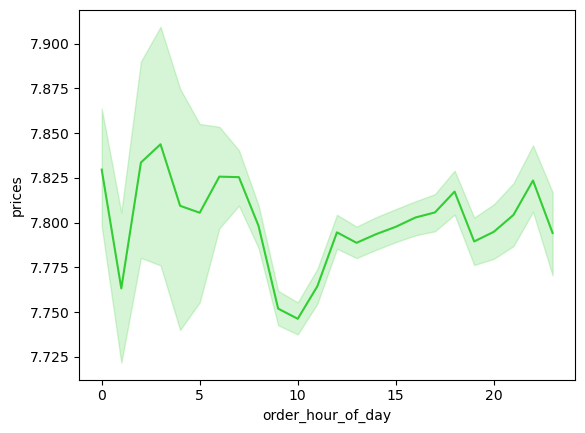

In [34]:
#creating line plot
hr_price_line = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices', color = 'limegreen')

In [36]:
#exporting image
hr_price_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hrs'))

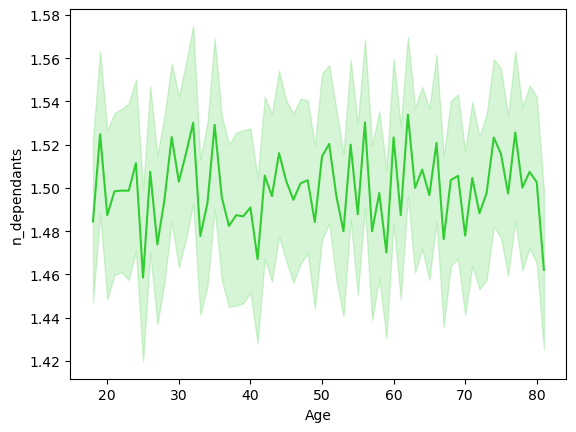

In [38]:
#creating line chart age & dependants
line_age_dep = sns.lineplot(data = cust, x = 'Age',y = 'n_dependants', color = 'limegreen')

This line chart does not really indicate that the age and number of dependants are closely related. Other than to note at the age of 25 and 80, there is a big drop in dependants. 

In [39]:
#exporting image
line_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dep'))

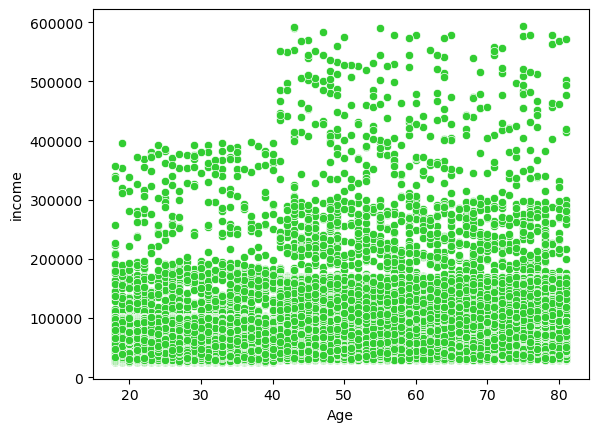

In [40]:
#creating scatterplot chart age & income
scatter_age_income = sns.scatterplot(data = cust, x = 'Age',y = 'income', color = 'limegreen')

This scatterplot indicates a few things about income. One thing to note is that the mojortity of income fall below 200k. There could be outliers for the highest bracket of income. When comparing the mean and the standard deviation, this would indicate that there are over 300 outliers for the top incomes. Additionally the high est incomes are in ages over 40. Lastly, after the age of 40, there seems to be a groupong of income between 200k and 300k, this may be a subgroup that coulb be targeted for marketing. 

In [41]:
#exporting image
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income'))